In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Loan payments data.csv')
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
data.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB
None


In [5]:
print(data.describe())

         Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       37.00000   30.000000
75%    1000.000000   30.000000       60.00000   35.000000
max    1000.000000   30.000000       76.00000   51.000000


## Data Cleaning 

In [6]:
data.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [7]:
data=data.drop('Loan_ID',axis=1)

In [8]:
data.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'paid_off_time', 'past_due_days', 'age', 'education', 'Gender'],
      dtype='object')

In [9]:
print(data.isnull().sum())
print('\n')
print(len(data))

loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64


500


In [10]:
data=data.drop(['paid_off_time','past_due_days'],axis=1)

In [11]:
data.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

## Data Visualisation 

C:\Users\charishma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


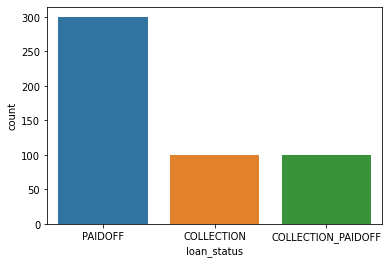

In [12]:
sns.countplot(data['loan_status'])
plt.show()

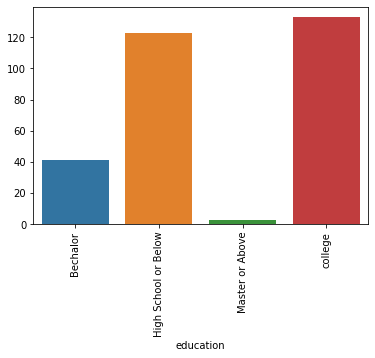

In [13]:
sns.barplot(x=data[data['loan_status']=='PAIDOFF'].groupby('education')['Gender'].count().index,
           y=data[data['loan_status']=='PAIDOFF'].groupby('education')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

C:\Users\charishma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


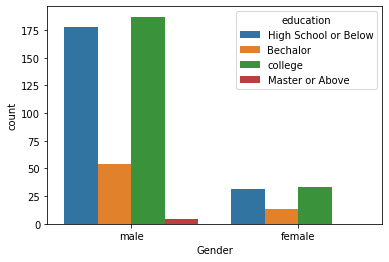

In [14]:
sns.countplot(data['Gender'],hue=data['education'])
plt.show()

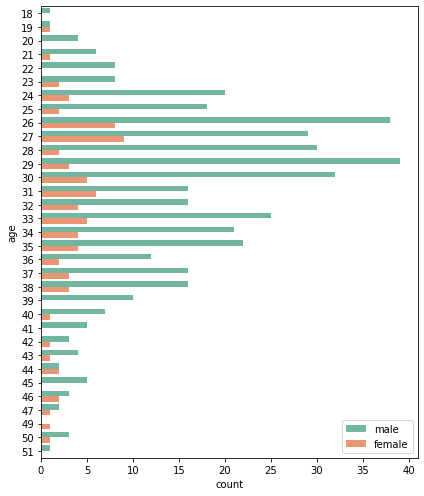

In [15]:
plt.figure(figsize=(6,7))
sns.countplot(y=data['age'],palette="Set2",hue=data['Gender'])
plt.legend(loc=4)
plt.tight_layout()
plt.show()

In [16]:
data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [17]:
dataset=data[['loan_status','Principal','terms','age','education','Gender']]

In [18]:
dataset.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,50,Bechalor,female
2,PAIDOFF,1000,30,33,Bechalor,female
3,PAIDOFF,1000,15,27,college,male
4,PAIDOFF,1000,30,28,college,female


## Encoding Categorical Values

In [19]:
loan_status_col = dataset.pop('loan_status')
dataset.insert(5,"loan_status",loan_status_col)

In [20]:
dataset.head()

,Principal,terms,age,education,Gender,loan_status
0,1000,30,45,High School or Below,male,PAIDOFF
1,1000,30,50,Bechalor,female,PAIDOFF
2,1000,30,33,Bechalor,female,PAIDOFF
3,1000,15,27,college,male,PAIDOFF
4,1000,30,28,college,female,PAIDOFF


In [21]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [22]:
print(X.head())

   Principal  terms  age             education  Gender
0       1000     30   45  High School or Below    male
1       1000     30   50              Bechalor  female
2       1000     30   33              Bechalor  female
3       1000     15   27               college    male
4       1000     30   28               college  female


In [23]:
y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoding',OneHotEncoder(),[3,4])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

In [27]:
X_train

array([[   0.,    1.,    0., ..., 1000.,   15.,   36.],
       [   0.,    0.,    1., ...,  800.,   15.,   39.],
       [   0.,    0.,    0., ...,  800.,   15.,   34.],
       ...,
       [   0.,    1.,    0., ..., 1000.,   30.,   23.],
       [   0.,    0.,    0., ..., 1000.,   30.,   32.],
       [   0.,    1.,    0., ...,  800.,   15.,   35.]])

In [28]:
X_test

array([[   0.,    0.,    0., ...,  800.,   15.,   34.],
       [   0.,    0.,    0., ..., 1000.,   30.,   32.],
       [   0.,    1.,    0., ..., 1000.,   30.,   30.],
       ...,
       [   0.,    0.,    0., ...,  800.,   15.,   24.],
       [   0.,    1.,    0., ..., 1000.,   30.,   27.],
       [   0.,    0.,    0., ..., 1000.,   15.,   38.]])

In [29]:
y_train

array([2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1,

In [30]:
y_test

array([2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(n_jobs=3)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(lr_pred,y_test)*100)

ACCURACY SCORE:
58.4


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(dt_pred,y_test)*100)

ACCURACY SCORE:
41.6


In [33]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(svm_pred,y_test)*100)

ACCURACY SCORE:
58.4


In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(nb_pred,y_test)*100)

ACCURACY SCORE:
26.400000000000002


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(rfc_pred,y_test)*100)

ACCURACY SCORE:
45.6


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(gb_pred,y_test)*100)

ACCURACY SCORE:
55.2


In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
print("ACCURACY SCORE:")
print(accuracy_score(abc_pred,y_test)*100)

ACCURACY SCORE:
57.599999999999994
